In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format 
pd.options.display.max_rows = None 
pd.options.display.max_columns = None 
sns.set()

In [3]:
#wrangle fun 
def wrangle (filename , encoding , dropna_column_names= None , change_columns_names= None , date_column = None , remove_duplicated_rows_in_col = []):
    #loading data from csv
    df = pd.read_csv(filename ,encoding= encoding)
    
    #delete NaN rows in column orderid
    df.dropna(subset= dropna_column_names ,inplace=True)
    
    #Rename columns 
    df = df.rename(columns= change_columns_names )
    
    #change orderDate type to datetime 
    df[date_column] = pd.to_datetime(df[date_column])
    
    #drop duplicated rows
    df = df.drop_duplicates(subset= remove_duplicated_rows_in_col)
    
    # strip and lower case column 
    df.columns = df.columns.str.strip().str.lower()
   
    
    return df
    
   

In [4]:
#loading data 
orders = wrangle('all_data.csv' , "latin-1" ,dropna_column_names=['OrderID'] , change_columns_names={'City.1' : 'SuppCity', 'Country.1' : 'SuppCountry' , 'Phone.1' : 'SuppPhone'} , date_column = 'OrderDate' , remove_duplicated_rows_in_col = ['OrderID'])
for cols in orders.columns:
    if 'ID' in cols or 'OrderNumber' in cols : 
        orders[cols] = orders[cols].astype(int)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 2130
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customerid      830 non-null    float64       
 1   firstname       830 non-null    object        
 2   lastname        830 non-null    object        
 3   city            830 non-null    object        
 4   country         830 non-null    object        
 5   phone           830 non-null    object        
 6   orderid         830 non-null    float64       
 7   orderdate       830 non-null    datetime64[ns]
 8   ordernumber     830 non-null    float64       
 9   totalamount     830 non-null    float64       
 10  productid       830 non-null    float64       
 11  productname     830 non-null    object        
 12  unitprice       830 non-null    float64       
 13  package         830 non-null    object        
 14  isdiscontinued  830 non-null    object        
 15  suppl

In [5]:
#Describe TotalAmount col
orders.totalamount.describe()

count      830.00
mean     1,631.88
std      1,990.61
min         12.50
25%        480.00
50%      1,015.90
75%      2,028.65
max     17,250.00
Name: totalamount, dtype: float64

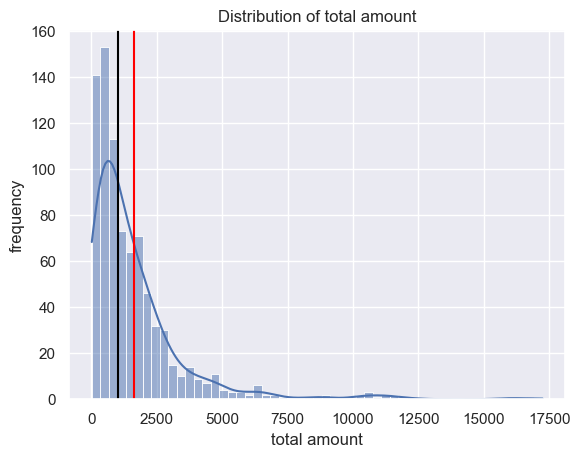

In [13]:
#Data shape
sns.histplot(data=orders , x='totalamount',kde=True)
plt.title('Distribution of total amount')
plt.xlabel('total amount')
plt.ylabel('frequency')
plt.axvline(orders.totalamount.mean() , color='red')
plt.axvline(orders.totalamount.median() , color='black')



In [ ]:
min = orders.totalamount.min() 
q1 = orders.totalamount.quantile(0.25) 
q2 = orders.totalamount.median() 
q1 = orders.totalamount.quantile(0.75) 
IQR = q3-q1 




